<a href="https://colab.research.google.com/github/mouraffa/Handwritten_Digits_Classifier/blob/main/Handwritten_Digits_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Purpose

The purpose of this project is to classify handwritten digits using a neural network approach. We will explore different models and techniques to improve the accuracy of the classification task. The project will involve building neural network models with different architectures, evaluating their performance, and comparing the results. By the end of the project, we aim to identify the most effective model for handwritten digit classification.


In [1]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

##the MNIST dataset

* The dataset used in this project is the MNIST dataset, which is a widely used benchmark dataset for handwritten digit recognition. It consists of 60,000 training images and 10,000 testing images, each representing a grayscale image of size 28x28 pixels. The images in the dataset are labeled with the corresponding digit ranging from 0 to 9.

* The dataset is already divided into training and testing sets, with the training set used to train the models and the testing set used to evaluate their performance. Before feeding the data into the models, we normalize the pixel values by dividing them by 255 to scale them between 0 and 1.

* The MNIST dataset serves as a standard benchmark for evaluating the performance of various machine learning algorithms and is a popular choice for tasks related to image classification and digit recognition.


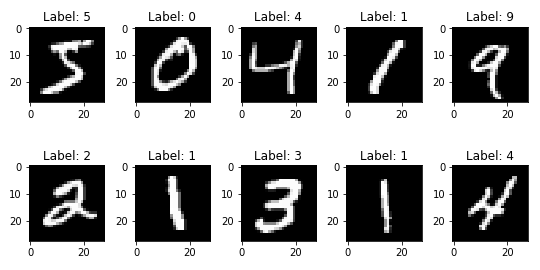

In [2]:
# Loading the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

# Checking the length of the training and test datasets
len(X_train), len(X_test)

(60000, 10000)

In [3]:
# Displaying the shape of the first training sample
X_train[0].shape

(28, 28)

In [4]:
# Displaying the pixel values of the first training sample
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Text(0.5, 0, '9')

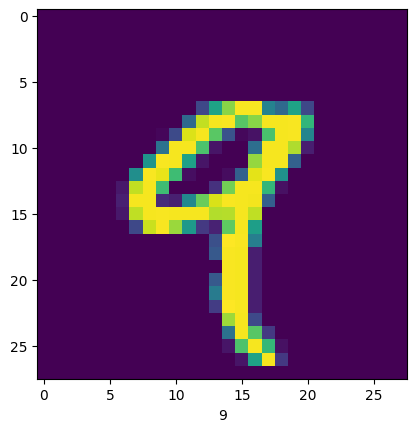

In [5]:
# Randomly selecting an image from the training set
import random

index = random.randint(0, np.max(Y_train))
plt.imshow(X_train[index])
plt.xlabel(Y_train[index])

In [6]:
# Normalizing the pixel values
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# Displaying the normalized pixel values of the first training sample
X_train[index]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

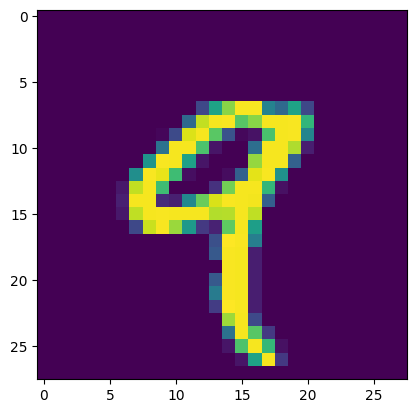

In [8]:
# Displaying the normalized image
plt.imshow(X_train[index])

In [9]:
# Reshaping the flattened data
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

# Displaying the shape of the flattened data
X_train_flattened.shape

(60000, 784)

In [10]:
# Displaying the flattened data for the first sample
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Very Simple Neural Network with No Hidden Layers

In [11]:
# Creating a sequential model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train_flattened, Y_train, epochs=1)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4710 - accuracy: 0.8752


In [12]:
# Evaluating the model on the test data
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3064 - accuracy: 0.9164


[0.3064431846141815, 0.9164000153541565]

## Using Hidden Layers

In [13]:
# Creating a sequential model with hidden layers
model_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compiling the model
model_hidden.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Training the model
model_hidden.fit(X_train_flattened, Y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2741 - accuracy: 0.9224


In [14]:
# Evaluating the model on the test data
model_hidden.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1519 - accuracy: 0.9545


[0.15189236402511597, 0.9545000195503235]

## Using Flatten Layer

In [15]:
# Creating a sequential model with a flatten layer
model_flatten = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compiling the model
model_flatten.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Training the model
model_flatten.fit(X_train, Y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2752 - accuracy: 0.9216


In [16]:
# Evaluating the model on the test data
model_flatten.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1567 - accuracy: 0.9542


[0.15665704011917114, 0.954200029373169]

## Convolutional Neural Network (CNN)

In [17]:
# Creating a sequential CNN model
CNN_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compiling the CNN model
CNN_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Reshaping the input data for the CNN model
X_train_cnn = np.expand_dims(X_train, -1)
X_test_cnn = np.expand_dims(X_test, -1)

# Training the CNN model
CNN_model.fit(X_train_cnn, Y_train, epochs=1)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1531 - accuracy: 0.9549


In [18]:
# Evaluating the CNN model on the test data
CNN_model.evaluate(X_test_cnn, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9763


[0.0691227838397026, 0.9763000011444092]

## Model Comparison

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9763


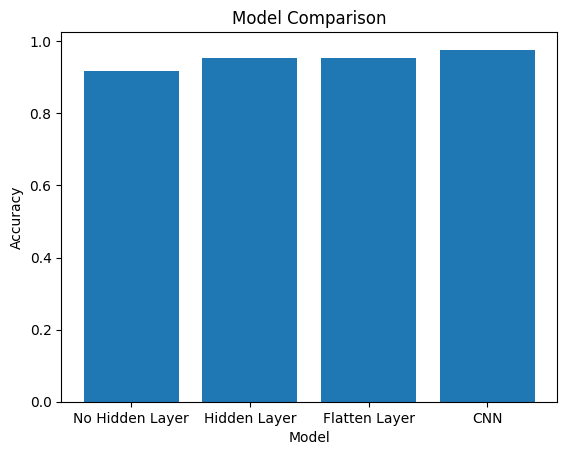

In [19]:
# Comparing the performance of all models
model_names = ['No Hidden Layer', 'Hidden Layer', 'Flatten Layer', 'CNN']
models = [model, model_hidden, model_flatten, CNN_model]
accuracies = []

for model in models:
    if model == CNN_model:
        X_test_cnn = np.expand_dims(X_test, -1)
        _, accuracy = model.evaluate(X_test_cnn, Y_test)
    else:
        _, accuracy = model.evaluate(X_test_flattened, Y_test)
    accuracies.append(accuracy)

# Plotting the model accuracies
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


## Conclusion

In this project, we explored different models for handwritten digits classification using a neural network approach. We started with a simple neural network without any hidden layers and observed its performance. Then, we added a hidden layer and compared the results. We further experimented with a flatten layer to avoid reshaping the input data and a convolutional neural network (CNN) model.

Based on the model comparison, we can see that the CNN model achieved the highest accuracy among the models tested, indicating its effectiveness in capturing the spatial information in the image data.

Overall, this project demonstrates the importance of exploring different model architectures and techniques for improving the accuracy of classification tasks.